<a href="https://colab.research.google.com/github/rnlchr/CPE311/blob/main/Team%202%20Case%20Study%201/TEAM_2_CASE_STUDY_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRELIM CASE STUDY 1: COMPUTATIONAL THINKING USING PYTHON**

**Real-World Problem:**

A newly promoted Salaryman wants to know if they can get a new vehicle as a form of reward for themselves. But they wants to know if they can afford it, with its other costs. Since a vehicle is not an investment, but a convenient liability, there are things to consider like Gas, insurance, as well as maintenance. He also wants to make sure that he still has enough money to pay for his other necessities, bills, and hobbies.


first, we need the details, so we created a getDetails() function to where we can get our parameters for later. present here are their monthlySalary, vehiclePrice, loan(in terms of years), annualInterestRate, insurance, fuelCost, and maintenanceCost.

In [40]:
def getDetails():
    print("Callin' for some Wheels? Lets check if you can afford it!")
    monthlySalary = float(input("Enter your monthly salary: ")) # get inputs for user's monthly salary
    vehiclePrice = float(input("Enter the vehicle price: ")) # get inputs for desired vehicle's price
    loan = int(input("Enter the loan term (in years): ")) # get inputs for the loan term in years
    annualInterestRate = float(input("Enter the annual interest rate (as a percentage): ")) # interest rate to be user later for calculating
    insurance = float(input("Enter the monthly insurance cost: ")) # car necessities that need to be considered
    fuelCost = float(input("Enter the estimated monthly fuel cost: "))
    maintenanceCost = float(input("Enter the estimated monthly maintenance cost: "))

    return (monthlySalary, vehiclePrice, loan, annualInterestRate, insurance, fuelCost, maintenanceCost)

in this function, we will use this formula:


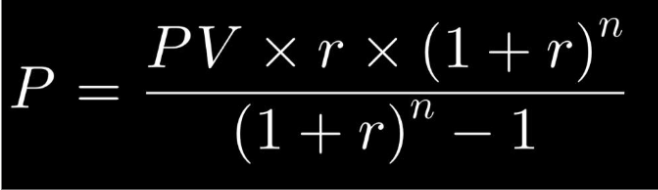

which is a derivative of the Loans Formula, given to us by a Local Dealership (Honda Motors, Novaliches Bayan)

here we convert the loan term in years to months, we do the same for the annual interest rate so we can determine its monthly interest rate. we also created a conditional statement to handle a condition where the interest rate is 0.

our principal value(PV) in terms of the code is the vehicle price, and r is the monthly interest rate, and n is the load term in Months.

In [ ]:
def calcPayment(vehiclePrice, loan, annualInterestRate): # function for calculating, we are using a formula given to us by a local dealership
    loanTermMonths = loan * 12
    monthlyInterestRate = (annualInterestRate / 100) / 12


    monthlyPayments = [0] * (loanTermMonths + 1)# list to store monthly payments for calculating

    if monthlyInterestRate == 0:
        monthlyPayments = [vehiclePrice / loanTermMonths] * (loanTermMonths + 1) # condition if interest rate is zero
    else:

        for month in range(1, loanTermMonths + 1):
            monthlyPayments[month] = (vehiclePrice * monthlyInterestRate * (1 + monthlyInterestRate)**month) / ((1 + monthlyInterestRate)**month - 1) # calculate monthly payments

    return monthlyPayments[-1]  # return last monthly payment

next, we create the monthlyCost function where we get all of the values of the monthly costs for the vehicle and add them all.

In [ ]:
def monthlyCost(monthlyPayment, insurance, fuelCost, maintenanceCost):
    return monthlyPayment + insurance + fuelCost + maintenanceCost

this function is where we determine whether or not we can get the vehicle or not. The dealership advised us that if the monthly payment is worth more than 15% of your monthly salary, they would advise on not purchasing, so we created a new variable 'percentage' where we set a max value of 15. then we compute for the threshold in which we can make our decision. if total monthly cost <= to the variable iWantToKnow(Threshold/Max), we can afford it, if not then no.

In [ ]:
def canIGetIt(monthlySalary, totalMonthlyCost, percentage=15):
    iWantToKnow = (percentage / 100) * monthlySalary
    return totalMonthlyCost <= iWantToKnow

since we are determining if we can get a new vehicle, lets name the main function newWheels(). here wec all all of our functions so we can test if the program works, or not.

In [44]:
def newWheels():
    monthlySalary, vehiclePrice, loan, annualInterestRate, insurance, fuelCost, maintenanceCost = getDetails()

    # Calculate monthly payment using dynamic programming approach
    monthlyPayment = calcPayment(vehiclePrice, loan, annualInterestRate)

    # Calculate total monthly cost
    totalMonthlyCost = monthlyCost(monthlyPayment, insurance, fuelCost, maintenanceCost)

    # Check affordability
    canIGetIt_result = canIGetIt(monthlySalary, totalMonthlyCost)

    # Display result
    if canIGetIt_result:
        print("Nice! You can afford this vehicle!")
    else:
        print("You cannot afford this vehicle based on your current monthly salary.")

newWheels()



Callin' for some Wheels? Lets check if you can afford it!
Enter your monthly salary: 5000
Enter the vehicle price: 15000
Enter the loan term (in years): 3
Enter the annual interest rate (as a percentage): 4
Enter the monthly insurance cost: 150
Enter the estimated monthly fuel cost: 100
Enter the estimated monthly maintenance cost: 50
Nice! You can afford this vehicle!


Lets try for a different outcome


In [46]:
newWheels()

Callin' for some Wheels? Lets check if you can afford it!
Enter your monthly salary: 4000
Enter the vehicle price: 15000
Enter the loan term (in years): 2
Enter the annual interest rate (as a percentage): 4
Enter the monthly insurance cost: 220
Enter the estimated monthly fuel cost: 140
Enter the estimated monthly maintenance cost: 220
You cannot afford this vehicle based on your current monthly salary.
